# Filipino Family Income and Expenditure
## Phase I: Presprocessing
### Loading the Datatset
The dataset was downloaded from Kaggle.com's Filipino Family Income and Expenditure and saved in dataset.csv

In [52]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np

dataset ='dataset.csv'
dataset = pd.read_csv(dataset)
dataset.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Bread and Cereals Expenditure',
       'Total Rice Expenditure', 'Meat Expenditure',
       'Total Fish and  marine products Expenditure', 'Fruit Expenditure',
       'Vegetables Expenditure', 'Restaurant and hotels Expenditure',
       'Alcoholic Beverages Expenditure', 'Tobacco Expenditure',
       'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Completed',
       'Household Head Job or

### Cleaning the Dataset
Dropping uneeded columns and rows with null values.

In [53]:
dataset = dataset.dropna()

dataset = dataset.drop(['Bread and Cereals Expenditure',
       'Total Rice Expenditure', 'Meat Expenditure',
       'Total Fish and  marine products Expenditure', 'Fruit Expenditure',
       'Vegetables Expenditure', ], axis = 1)

## Phase II: Feature Engineering
### Replacing values with unique integers
#### Converting categories to int
Columns 'Region', 'Main Source of Income', 'Household Head Sex', 'Household Head Marital Status', 'Household Head Highest Grade Completed', 
           'Household Head Job or Business Indicator', 'Household Head Occupation', 'Household Head Class of Worker', 
           'Type of Household' were tokenized to its int counterpart. The list of unique values were printed before tokenizing.

In [54]:
columns = ['Region', 'Main Source of Income', 'Household Head Sex', 'Household Head Marital Status', 'Household Head Highest Grade Completed', 
           'Household Head Job or Business Indicator', 'Household Head Occupation', 'Household Head Class of Worker', 
           'Type of Household']

columns_string = {}

for column in columns:
    columns_string[column] = dataset[column].unique()
    for index, occ in enumerate(dataset[column].unique()):
        dataset[column] = dataset[column].replace(occ, index)
    dataset[column] = pd.to_numeric(dataset[column])

for column in dataset.columns:
    dataset[column] = dataset[column].astype('float64')

#### Binning the columns to represent them by category
Columns 'Total Household Income', 'Total Food Expenditure',
       'Main Source of Income', 'Bread and Cereals Expenditure',
       'Total Rice Expenditure', 'Meat Expenditure',
       'Total Fish and  marine products Expenditure', 'Fruit Expenditure',
       'Vegetables Expenditure', 'Restaurant and hotels Expenditure',
       'Alcoholic Beverages Expenditure', 'Tobacco Expenditure',
       'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Age' were binned to make them categotical. The bin edges were printed afterwards.

In [56]:
columns = ['Total Household Income', 
       'Imputed House Rental Value',
      'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Restaurant and hotels Expenditure',
       'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure',   'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure']

columns_bins = {}

for column in columns: 
    counts, bin_edges = np.histogram(dataset[column], bins=300)
    dataset[column] = dataset[column].astype('float')
    dataset[column] = pd.cut(dataset[column], bin_edges, right=False, labels = False)
    dataset[column] = pd.to_numeric(dataset[column])
    print("Column: {0}, number of bins: {1}".format(column, len(bin_edges)))
    columns_bins[column] = bin_edges
    
column = 'Household Head Age'
counts, bin_edges = np.histogram(dataset[column], bins=10)
dataset[column] = dataset[column].astype('float')
dataset[column] = pd.cut(dataset[column], bin_edges, right=False, labels = False)
dataset[column] = pd.to_numeric(dataset[column])
print("Column: {0}, number of bins: {1}".format(column, len(bin_edges)))
columns_bins[column] = bin_edges
    
column = 'Total Food Expenditure'
counts, bin_edges = np.histogram(dataset[column], bins=5)
dataset[column] = dataset[column].astype('float')
dataset[column] = pd.cut(dataset[column], bin_edges, right=False, labels = False)
dataset[column] = pd.to_numeric(dataset[column])
print("Column: {0}, number of bins: {1}".format(column, len(bin_edges)))
print("Bin Edges: {0}".format(bin_edges))
columns_bins[column] = bin_edges
    
dataset = dataset.dropna()

Column: Total Household Income, number of bins: 301
Column: Imputed House Rental Value, number of bins: 301
Column: Crop Farming and Gardening expenses, number of bins: 301
Column: Total Income from Entrepreneurial Acitivites, number of bins: 301
Column: Restaurant and hotels Expenditure, number of bins: 301
Column: Alcoholic Beverages Expenditure, number of bins: 301
Column: Tobacco Expenditure, number of bins: 301
Column: Clothing, Footwear and Other Wear Expenditure, number of bins: 301
Column: Housing and water Expenditure, number of bins: 301
Column: Medical Care Expenditure, number of bins: 301
Column: Transportation Expenditure, number of bins: 301
Column: Communication Expenditure, number of bins: 301
Column: Education Expenditure, number of bins: 301
Column: Miscellaneous Goods and Services Expenditure, number of bins: 301
Column: Special Occasions Expenditure, number of bins: 301
Column: Household Head Age, number of bins: 11
Column: Total Food Expenditure, number of bins: 6


In [119]:
temp = np.append(bin_edges, [int(200000)])
temp.sort()
print(len(bin_edges))
print(temp)
print(np.where(temp==200000)[0][0])
print(bin_edges[1])

6
[  3704.   32962.4  62220.8  91479.2 120737.6 149996.  200000. ]
6
32962.4


### Feature Selection
#### Creating a minified dataset
The features were selected using fifty instances from every region to make the processing faster. The chosen instances were saved in newDF.

In [0]:
newDF = dataset
newDF = newDF.drop(newDF.index, axis = 0)

for index, occ in enumerate(dataset['Region'].unique()):
        newDF = pd.concat([newDF, dataset[dataset.Region == index][:50]])
    
X_sel = newDF.drop(['Total Food Expenditure'], axis = 1)
y_sel = newDF['Total Food Expenditure']

#### Using RFE and SVC to select the best features
SVC with a linear kernel was used to select the ten best features. The chosen features are then stores in fit.support_.

In [39]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

svc = SVC(kernel="linear", C=1)
rfe = RFE(svc, 10)
fit = rfe.fit(X_sel, y_sel)

print("Selected Features: {0}".format(fit.support_)) 
print("Feature Ranking: {0}".format(fit.ranking_)) 
print()
print("Selected Columns:")
for ind in np.where(fit.support_==True)[0]:
  print(X_sel.columns[ind])

Selected Features: [False  True  True False  True False False  True False  True  True  True
 False False False False False False  True False False False False False
  True  True]
Feature Ranking: [ 9  1  1  8  1 12  4  1  7  1  1  1  2 15  5 10 11  3  1 14 16 17 13  6
  1  1]

Selected Columns:
Region
Main Source of Income
Alcoholic Beverages Expenditure
Housing and water Expenditure
Medical Care Expenditure
Transportation Expenditure
Communication Expenditure
Household Head Age
Type of Household
Total Number of Family members


#### Generation of new Dataset with Selected Features
The columns were from the columns chosen by fit.support_. The target column and the data columns are then separated to be ready for classification.

In [0]:
new = dataset
new = newDF.drop(newDF.index, axis = 0)

for index, occ in enumerate(dataset['Total Food Expenditure'].unique()):
        new = pd.concat([new, dataset[dataset['Total Food Expenditure'] == index][:2000]])

X_new = new.drop(['Total Food Expenditure'], axis = 1)
X_new = X_new[X_new.columns[np.where(fit.support_==True)[0]]]
y = new['Total Food Expenditure']

## Phase III: Visualization of the Datasets
### Correlation of the chosen columns
Shows the intercorrelation of the columns as well as its correlation to the target column ('Total Food Expenditure')

In [41]:
pd.concat([X_new, y], axis=1).corr().style.background_gradient().set_precision(3).set_properties(**{'font-size': '10pt'})

,Region,Main Source of Income,Alcoholic Beverages Expenditure,Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Household Head Age,Type of Household,Total Number of Family members,Total Food Expenditure
Region,1,-0.171,-0.0778,-0.249,-0.0387,-0.121,-0.155,-0.0131,0.0145,0.0443,-0.214
Main Source of Income,-0.171,1,0.0612,0.0796,0.024,0.164,0.11,-0.0993,-0.0458,0.0631,0.181
Alcoholic Beverages Expenditure,-0.0778,0.0612,1,0.0809,0.0267,0.0883,0.0845,-0.0135,-0.0572,0.0656,0.202
Housing and water Expenditure,-0.249,0.0796,0.0809,1,0.206,0.473,0.619,0.0445,-0.0826,0.00707,0.473
Medical Care Expenditure,-0.0387,0.024,0.0267,0.206,1,0.177,0.196,0.0767,-0.0672,-0.00872,0.141
Transportation Expenditure,-0.121,0.164,0.0883,0.473,0.177,1,0.555,0.00136,-0.0829,0.0923,0.482
Communication Expenditure,-0.155,0.11,0.0845,0.619,0.196,0.555,1,0.0229,-0.0573,0.0162,0.479
Household Head Age,-0.0131,-0.0993,-0.0135,0.0445,0.0767,0.00136,0.0229,1,-0.202,-0.093,-0.0715
Type of Household,0.0145,-0.0458,-0.0572,-0.0826,-0.0672,-0.0829,-0.0573,-0.202,1,-0.351,-0.222
Total Number of Family members,0.0443,0.0631,0.0656,0.00707,-0.00872,0.0923,0.0162,-0.093,-0.351,1,0.466


### Cross Tabulation between the Total Food Expenditure and the Region
Shows in which region is a particular bin most common

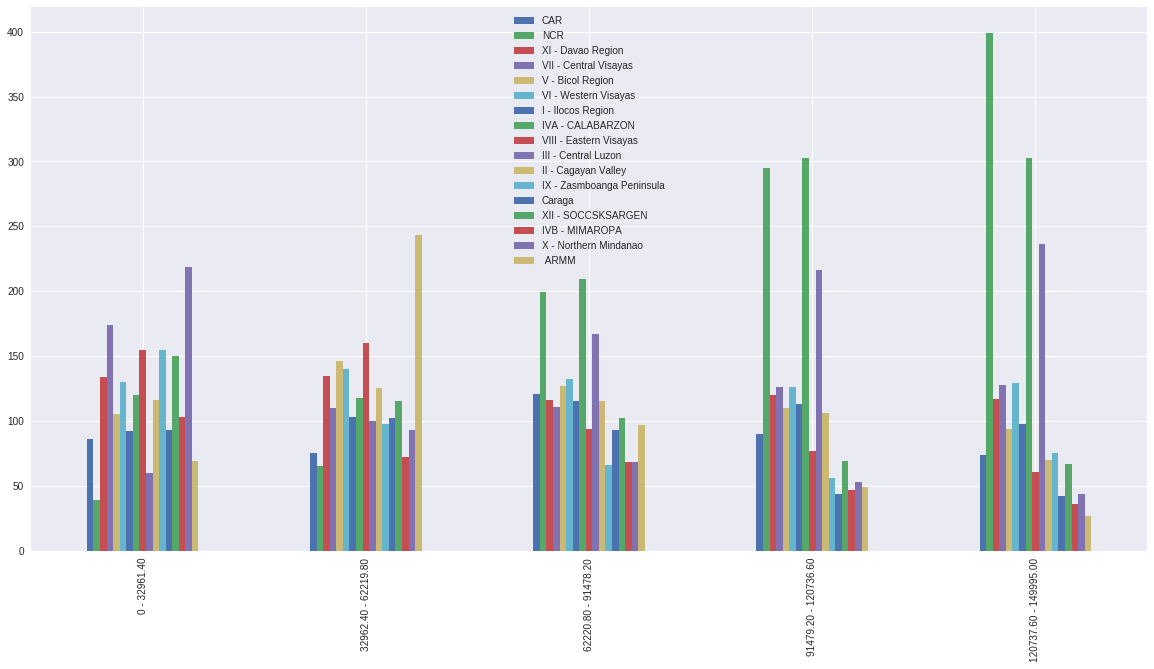

In [42]:
crossTab = pd.crosstab(new["Total Food Expenditure"], new["Region"], rownames=['Total Food Expenditure Bins'], colnames=['Region'])

bins = columns_bins["Total Food Expenditure"]
index_names = ["0 - {0:.2f}".format(bins[1]-1), 
               "{0:.2f} - {1:.2f}".format (bins[1], bins[2]-1),
               "{0:.2f} - {1:.2f}".format (bins[2], bins[3]-1),
               "{0:.2f} - {1:.2f}".format (bins[3], bins[4]-1),
               "{0:.2f} - {1:.2f}".format (bins[4], bins[5]-1),
              ]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1,1)

df = pd.DataFrame(crossTab.values, 
               index= index_names,
               columns=columns_string["Region"])

df.plot(kind='bar' , ax = ax)
plt.show()

### Cross Tabulation between the Total Food Expenditure and the Main Source of Income
Shows in which main source of income is common in a particular bin

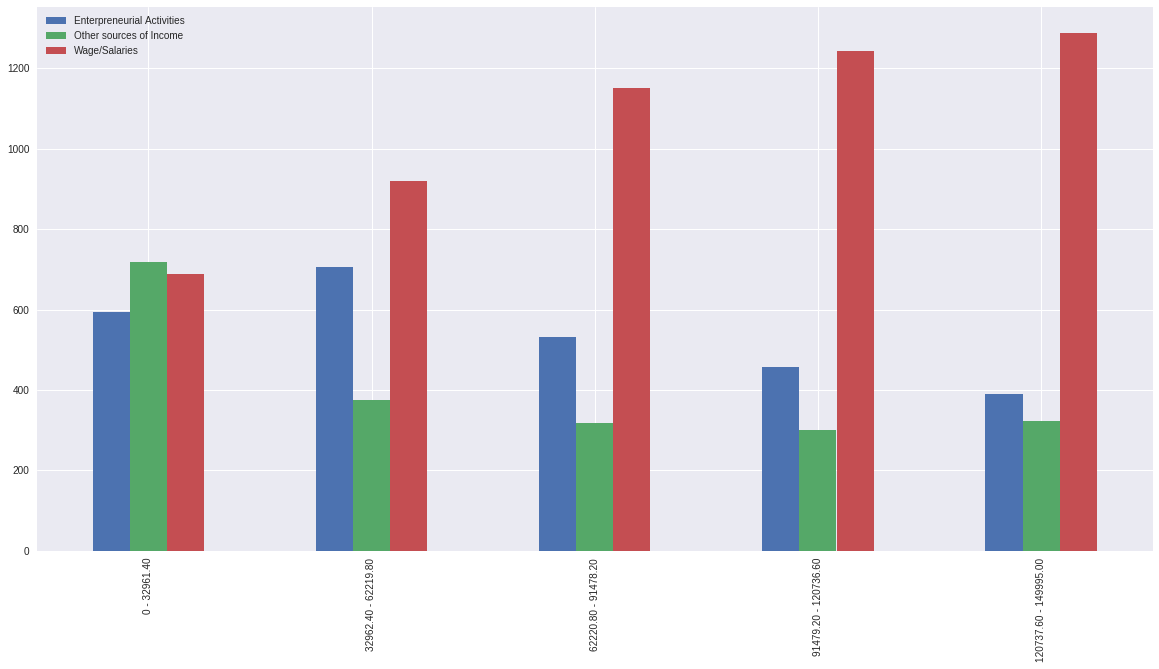

In [43]:
crossTab = pd.crosstab(new["Total Food Expenditure"], new["Main Source of Income"], rownames=['Total Food Expenditure Bins'], colnames=['Main Source of Income'])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1,1)

df = pd.DataFrame(crossTab.values, 
               index=index_names,
               columns=columns_string["Main Source of Income"])

df.plot(kind='bar' , ax = ax)
plt.show()

### Cross Tabulation between the Total Food Expenditure and the Type of Household
Shows in which Type of Household is common in a particular bin

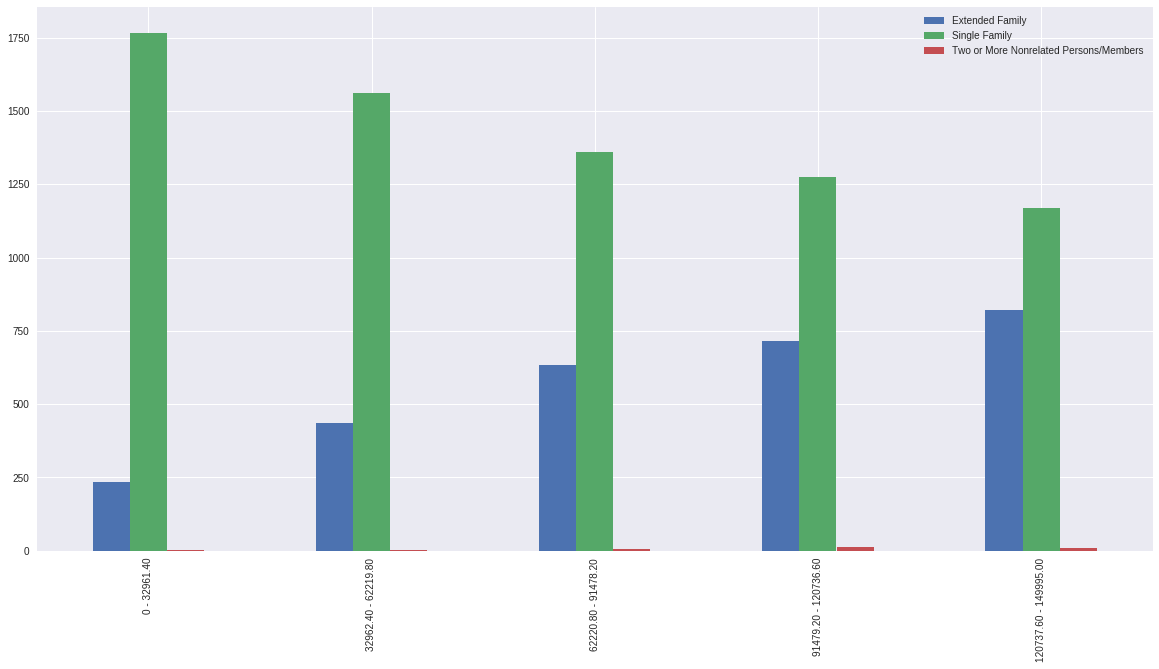

In [44]:
crossTab = pd.crosstab(new["Total Food Expenditure"], new["Type of Household"], rownames=['Total Food Expenditure Bins'], colnames=['Type of Household'])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1,1)

df = pd.DataFrame(crossTab.values, 
               index=index_names,
               columns=columns_string["Type of Household"])

df.plot(kind='bar' , ax = ax)
plt.show()

### Cross Tabulation between the Total Food Expenditure and the Number of Family Members
Shows in which size of family is common in a particular bin

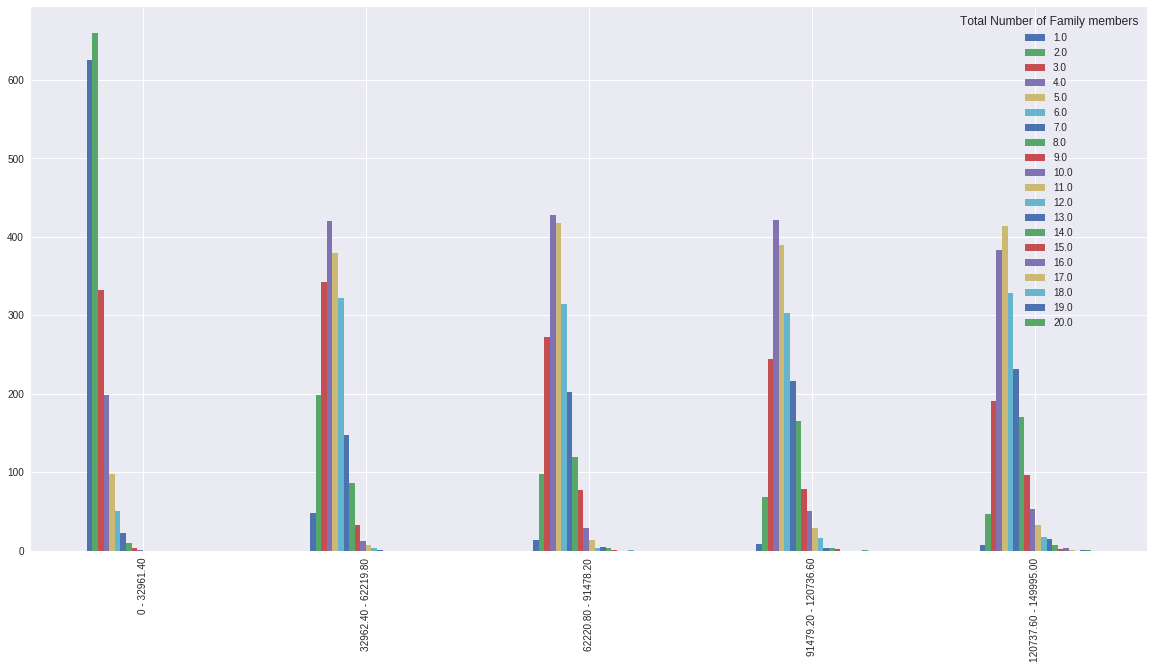

In [45]:
crossTab = pd.crosstab(new["Total Food Expenditure"], new["Total Number of Family members"], rownames=['Total Food Expenditure Bins'], colnames=['Total Number of Family members'])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1,1)

df = pd.DataFrame(crossTab.values, 
               index=index_names,
               columns=crossTab.columns)

df.plot(kind='bar' , ax = ax)
plt.show()

### Cross Tabulation between the Total Food Expenditure and the House Head Age
Shows in which bin of House Head Age is common in a particular bin

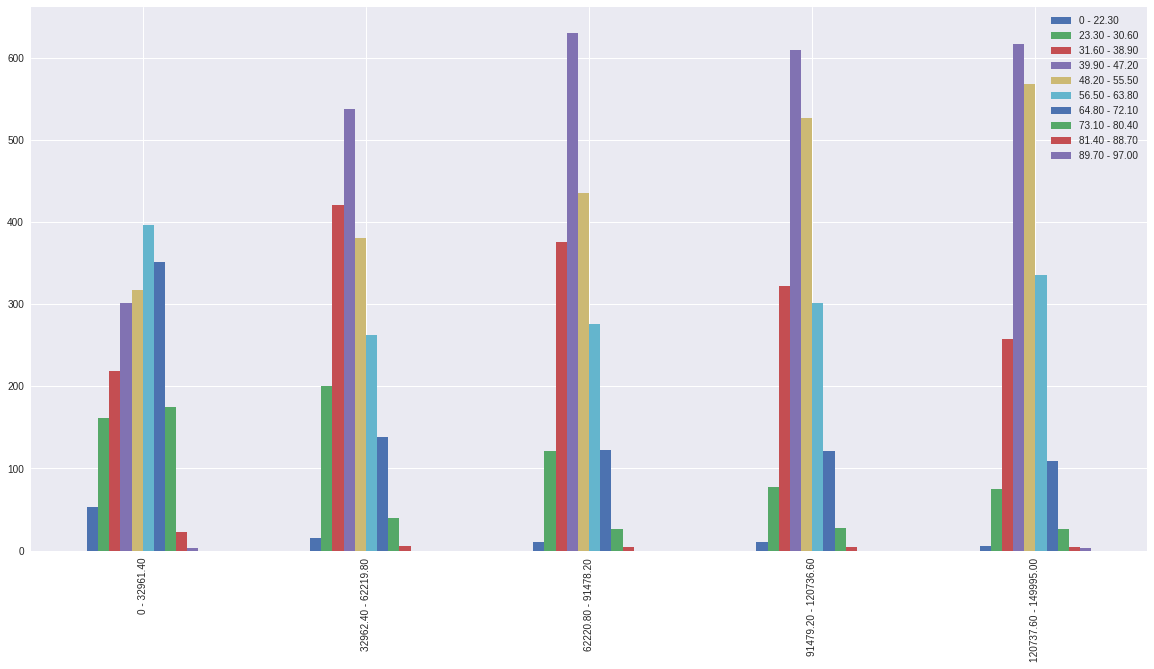

In [46]:
crossTab = pd.crosstab(new["Total Food Expenditure"], new["Household Head Age"], rownames=['Total Food Expenditure Bins'], colnames=['Household Head Age'])

hbins = columns_bins["Household Head Age"]
household_age = ["0 - {0:.2f}".format(hbins[1]-1), 
               "{0:.2f} - {1:.2f}".format (hbins[1], hbins[2]-1),
               "{0:.2f} - {1:.2f}".format (hbins[2], hbins[3]-1),
               "{0:.2f} - {1:.2f}".format (hbins[3], hbins[4]-1),
               "{0:.2f} - {1:.2f}".format (hbins[4], hbins[5]-1),
                 "{0:.2f} - {1:.2f}".format (hbins[5], hbins[6]-1),
                 "{0:.2f} - {1:.2f}".format (hbins[6], hbins[7]-1),
                 "{0:.2f} - {1:.2f}".format (hbins[7], hbins[8]-1),
                 "{0:.2f} - {1:.2f}".format (hbins[8], hbins[9]-1),
                 "{0:.2f} - {1:.2f}".format (hbins[9], hbins[10]-1),
              ]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1,1)

df = pd.DataFrame(crossTab.values, 
               index= index_names,
               columns=household_age)

df.plot(kind='bar' , ax = ax)
plt.show()

### Correlation Description of Total Food Expenditure and Alcoholic Beverages Expenditure
Describes the relationship between the two features

--------------------------------------------------------
Correlation Report
--------------------------------------------------------
Slope:                           1.9005500000000002
Intercept:                       3.3382
Pearson's correlation:           0.2020370893804176
P-value:                         1.3076645380332653e-92
Standard Error:                  0.09213866534729268
--------------------------------------------------------


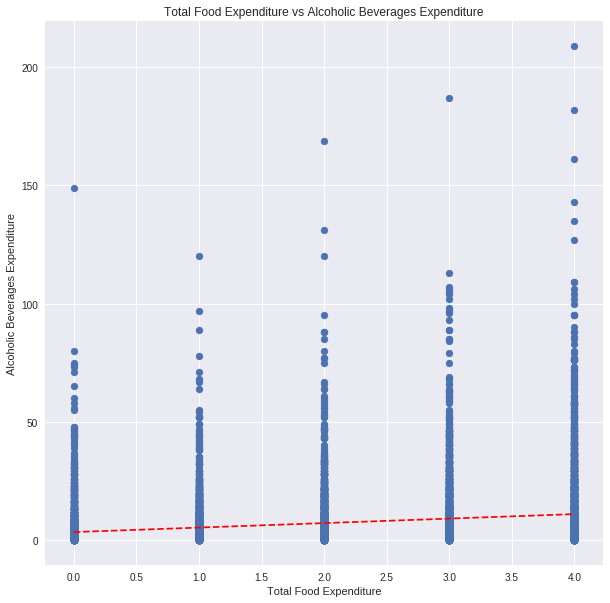

In [47]:
import scipy.stats

def correlate(y):
  correlationData = scipy.stats.linregress(new["Total Food Expenditure"], new[y])

  print("--------------------------------------------------------")
  print("Correlation Report")
  print("--------------------------------------------------------")
  print("Slope:                           {0}".format(correlationData[0]))
  print("Intercept:                       {0}".format(correlationData[1]))
  print("Pearson's correlation:           {0}".format(correlationData[2]))
  print("P-value:                         {0}".format(correlationData[3]))
  print("Standard Error:                  {0}".format(correlationData[4]))
  print("--------------------------------------------------------")


  from numpy.polynomial.polynomial import polyfit

  x_plot = new["Total Food Expenditure"]
  y_plot = new[y]

  fig, ax = plt.subplots(1,1,figsize=(10,10))
  b, m = polyfit(x_plot, y_plot, 1)

  ax.set_title("Total Food Expenditure vs {0}".format(y))
  ax.set_ylabel(y)
  ax.set_xlabel("Total Food Expenditure")
  ax.plot(x_plot, b + m * x_plot, 'r--')
  ax.scatter(x_plot,y_plot)

correlate("Alcoholic Beverages Expenditure")

### Correlation Description of Total Food Expenditure and Housing and water Expenditure
Describes the relationship between the two features

--------------------------------------------------------
Correlation Report
--------------------------------------------------------
Slope:                           2.513950000000001
Intercept:                       1.2798999999999987
Pearson's correlation:           0.4729144936761992
P-value:                         0.0
Standard Error:                  0.0468432210167175
--------------------------------------------------------


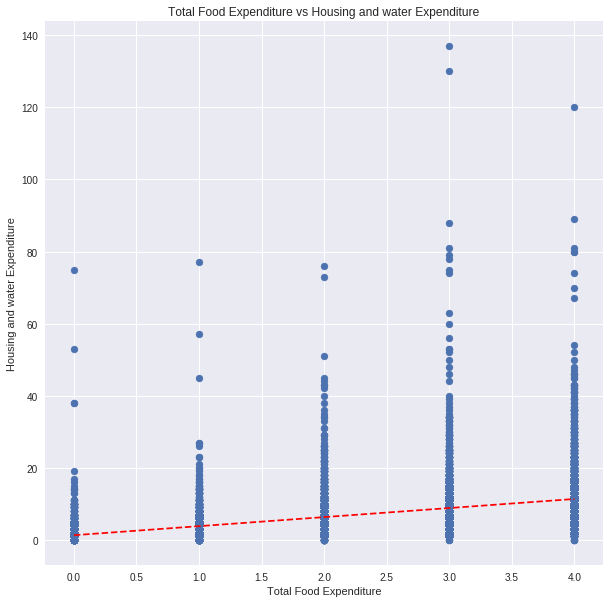

In [48]:
correlate("Housing and water Expenditure")

### Correlation Description of Total Food Expenditure and Medical Care Expenditure
Describes the relationship between the two features

--------------------------------------------------------
Correlation Report
--------------------------------------------------------
Slope:                           0.56865
Intercept:                       0.21439999999999992
Pearson's correlation:           0.141364262847298
P-value:                         8.403263043095599e-46
Standard Error:                  0.03982588722814219
--------------------------------------------------------


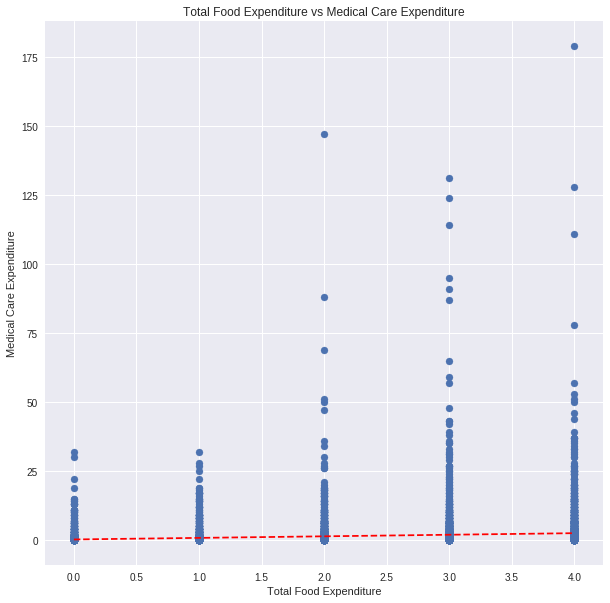

In [49]:
correlate("Medical Care Expenditure")

### Correlation Description of Total Food Expenditure and Transportation Expenditure
Describes the relationship between the two features

--------------------------------------------------------
Correlation Report
--------------------------------------------------------
Slope:                           3.7095000000000025
Intercept:                       0.8230999999999957
Pearson's correlation:           0.48215537135081793
P-value:                         0.0
Standard Error:                  0.0674090806296174
--------------------------------------------------------


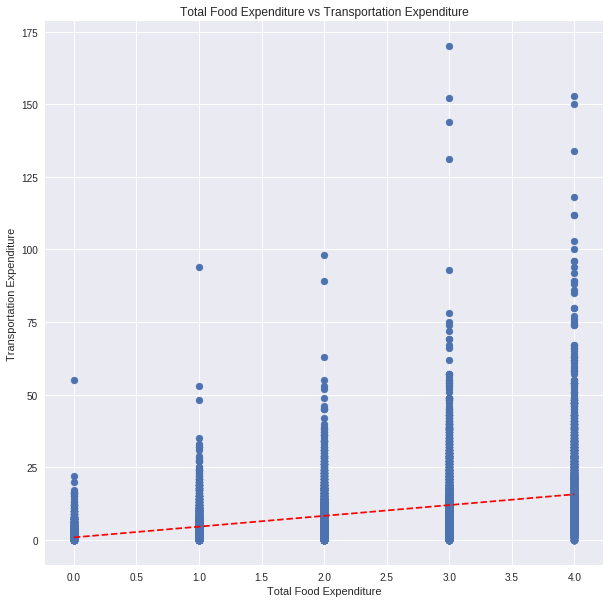

In [50]:
correlate("Transportation Expenditure")

### Correlation Description of Total Food Expenditure and Communication Expenditure
Describes the relationship between the two features

--------------------------------------------------------
Correlation Report
--------------------------------------------------------
Slope:                           7.740600000000001
Intercept:                       -0.9515000000000011
Pearson's correlation:           0.4785920739864432
P-value:                         0.0
Standard Error:                  0.14202524878963865
--------------------------------------------------------


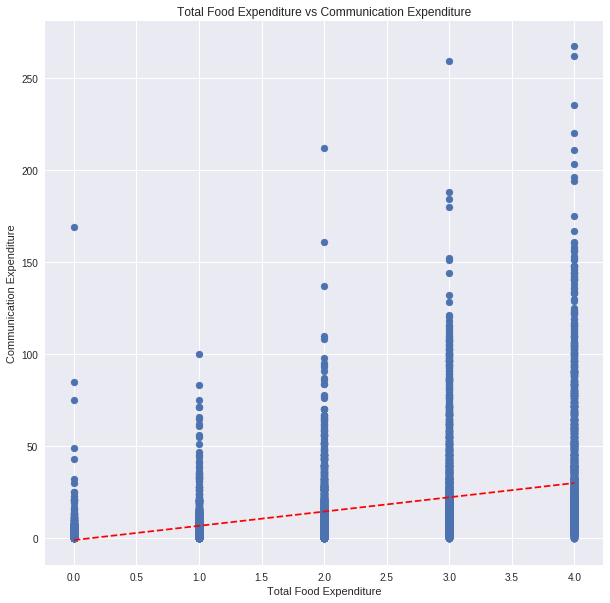

In [51]:
correlate("Communication Expenditure")

## Phase IV: Classification Models
### Random Forest Classifier

In [52]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

kfold = KFold(n_splits = 10, shuffle=True, random_state=0)

from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':[1, 10, 100, 200]}

grid_search_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv=kfold)
grid_search_tree.fit(X_new, y)
print("Best parameters: {}".format(grid_search_tree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_tree.best_score_))

print()
rf_model = RandomForestClassifier(n_estimators=grid_search_tree.best_params_['n_estimators'])
y_train_pred_tree = cross_val_predict(rf_model, X_new, y, cv=kfold)
print(classification_report(y, y_train_pred_tree, digits=5))

Best parameters: {'n_estimators': 100}
Best cross-validation score: 0.54

             precision    recall  f1-score   support

        0.0    0.84461   0.86150   0.85297      2000
        1.0    0.52861   0.58200   0.55402      2000
        2.0    0.38128   0.36050   0.37060      2000
        3.0    0.37549   0.33250   0.35269      2000
        4.0    0.53197   0.55750   0.54443      2000

avg / total    0.53239   0.53880   0.53494     10000



### KNeighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors':[3,5,7,9,10,100]}

grid_search_kn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold)

grid_search_kn.fit(X_new, y)
print("Best parameters: {}".format(grid_search_kn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_kn.best_score_))

print()
kn_model = KNeighborsClassifier(n_neighbors = grid_search_kn.best_params_['n_neighbors'] )
y_train_pred_eb_nb = cross_val_predict(kn_model, X_new, y, cv=kfold)
print(classification_report(y, y_train_pred_eb_nb, digits=5))

Best parameters: {'n_neighbors': 100}
Best cross-validation score: 0.51

             precision    recall  f1-score   support

        0.0    0.81399   0.80300   0.80846      2000
        1.0    0.48252   0.58650   0.52945      2000
        2.0    0.35210   0.32200   0.33638      2000
        3.0    0.35714   0.29250   0.32161      2000
        4.0    0.50634   0.53900   0.52216      2000

avg / total    0.50242   0.50860   0.50361     10000



### Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb= {'learning_rate':[0.1, 1, 10],
               'n_estimators':[1, 10, 100]}

grid_search_gb= GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=kfold)

grid_search_gb.fit(X_new, y)
print("Best parameters: {}".format(grid_search_gb.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_gb.best_score_))

print()
gb_model = GradientBoostingClassifier(learning_rate=grid_search_gb.best_params_['learning_rate'], n_estimators=grid_search_gb.best_params_['n_estimators'])
y_train_pred_gb = cross_val_predict(gb_model, X_new, y, cv=kfold)
print(classification_report(y, y_train_pred_gb, digits=5))


Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.55

             precision    recall  f1-score   support

        0.0    0.86186   0.86100   0.86143      2000
        1.0    0.53768   0.63150   0.58082      2000
        2.0    0.39912   0.36200   0.37965      2000
        3.0    0.38138   0.32150   0.34889      2000
        4.0    0.54250   0.58400   0.56248      2000

avg / total    0.54451   0.55200   0.54666     10000



### Voting Classifier Based on the three models

In [55]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[('rf_model',rf_model),
                                          ('kn_model',kn_model),
                                          ('gb_model',gb_model)],
                             voting='soft')

from sklearn.externals import joblib
print(joblib.dump(voting_model, 'voting_model.pkl'))

['voting_model.pkl']


In [56]:
y_train_pred_voting = cross_val_predict(voting_model, X_new, y, cv=kfold)
print(classification_report(y, y_train_pred_voting, digits=5))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

             precision    recall  f1-score   support

        0.0    0.85778   0.86250   0.86013      2000
        1.0    0.53056   0.62500   0.57392      2000
        2.0    0.38955   0.35800   0.37311      2000
        3.0    0.40323   0.32500   0.35991      2000
        4.0    0.54924   0.59950   0.57327      2000

avg / total    0.54607   0.55400   0.54807     10000



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Phase V: Model Evaluation

Text(0.5,1.05,'Voting Classifier')

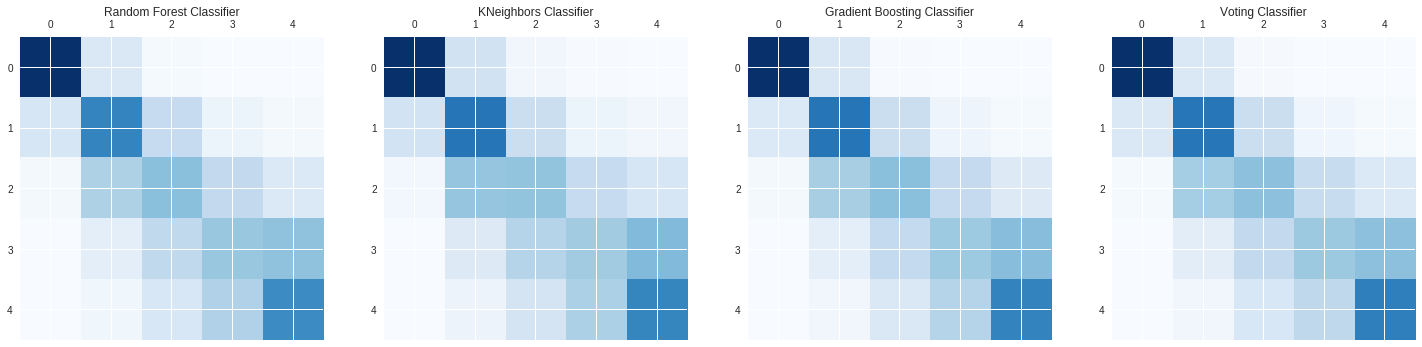

In [57]:
from sklearn.metrics import confusion_matrix
conf_mx_rf = confusion_matrix(y, y_train_pred_tree)
conf_mx_kn = confusion_matrix(y, y_train_pred_eb_nb)
conf_mx_gb = confusion_matrix(y, y_train_pred_gb)
conf_mx_voting = confusion_matrix(y, y_train_pred_voting)

con1_fig, con1_ax = plt.subplots(1,4, figsize=(25,10))

con1_ax[0].matshow(conf_mx_rf,cmap=plt.cm.Blues)
con1_ax[0].set_title("Random Forest Classifier")
con1_ax[1].matshow(conf_mx_kn,cmap=plt.cm.Blues)
con1_ax[1].set_title("KNeighbors Classifier")
con1_ax[2].matshow(conf_mx_gb,cmap=plt.cm.Blues)
con1_ax[2].set_title("Gradient Boosting Classifier")
con1_ax[3].matshow(conf_mx_voting,cmap=plt.cm.Blues)
con1_ax[3].set_title("Voting Classifier")